In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [3]:
Base = automap_base()

In [4]:
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['measurement', 'station']

In [6]:
measurement=Base.classes.measurement

In [7]:
station=Base.classes.station

In [8]:
session = Session(engine)

In [9]:
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)
measurement_data

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


In [10]:
station_data = pd.read_sql("SELECT * FROM station", conn)
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [30]:
# most recent date 
latest_date= session.query(func.max(measurement.date)).first()[0]
latest_date


'2017-08-23'

In [43]:
sel = measurement.id,measurement.station,measurement.date,measurement.prcp,measurement.tobs


records = session.query(*sel).filter(measurement.date <= '2017-08-23',measurement.date >= '2016-08-23').all()
print(f'ID,  Station,         Date,     prcp, tobs')
for record in records:
    print(record)



ID,  Station,         Date,     prcp, tobs
(2364, 'USC00519397', '2016-08-23', 0.0, 81.0)
(2365, 'USC00519397', '2016-08-24', 0.08, 79.0)
(2366, 'USC00519397', '2016-08-25', 0.08, 80.0)
(2367, 'USC00519397', '2016-08-26', 0.0, 79.0)
(2368, 'USC00519397', '2016-08-27', 0.0, 77.0)
(2369, 'USC00519397', '2016-08-28', 0.01, 78.0)
(2370, 'USC00519397', '2016-08-29', 0.0, 78.0)
(2371, 'USC00519397', '2016-08-30', 0.0, 79.0)
(2372, 'USC00519397', '2016-08-31', 0.13, 80.0)
(2373, 'USC00519397', '2016-09-01', 0.0, 81.0)
(2374, 'USC00519397', '2016-09-02', 0.0, 80.0)
(2375, 'USC00519397', '2016-09-03', 0.0, 79.0)
(2376, 'USC00519397', '2016-09-04', 0.03, 75.0)
(2377, 'USC00519397', '2016-09-05', None, 79.0)
(2378, 'USC00519397', '2016-09-06', None, 76.0)
(2379, 'USC00519397', '2016-09-07', 0.05, 76.0)
(2380, 'USC00519397', '2016-09-08', 0.0, 80.0)
(2381, 'USC00519397', '2016-09-09', 0.03, 79.0)
(2382, 'USC00519397', '2016-09-10', 0.0, 78.0)
(2383, 'USC00519397', '2016-09-11', 0.05, 76.0)
(2384, 

(8851, 'USC00517948', '2016-10-05', None, 80.0)
(8852, 'USC00517948', '2016-10-06', 0.07, 79.0)
(8853, 'USC00517948', '2016-10-07', None, 78.0)
(8854, 'USC00517948', '2016-10-11', None, 79.0)
(8855, 'USC00517948', '2016-10-13', None, 80.0)
(8856, 'USC00517948', '2016-10-17', None, 80.0)
(8857, 'USC00517948', '2016-10-18', None, 80.0)
(8858, 'USC00517948', '2016-10-19', None, 80.0)
(8859, 'USC00517948', '2016-10-20', None, 78.0)
(8860, 'USC00517948', '2016-10-21', None, 76.0)
(8861, 'USC00517948', '2016-10-24', None, 76.0)
(8862, 'USC00517948', '2016-10-25', 0.4, 77.0)
(8863, 'USC00517948', '2016-10-26', 0.2, 73.0)
(8864, 'USC00517948', '2016-10-27', None, 77.0)
(8865, 'USC00517948', '2016-10-28', None, 76.0)
(8866, 'USC00517948', '2016-10-31', None, 75.0)
(8867, 'USC00517948', '2016-11-04', None, 77.0)
(8868, 'USC00517948', '2016-11-07', None, 75.0)
(8869, 'USC00517948', '2016-11-09', 0.0, 76.0)
(8870, 'USC00517948', '2016-11-14', 0.02, 79.0)
(8871, 'USC00517948', '2016-11-15', None, 7

(19355, 'USC00516128', '2017-01-27', 0.03, 69.0)
(19356, 'USC00516128', '2017-01-28', 0.0, 64.0)
(19357, 'USC00516128', '2017-01-29', 0.55, 67.0)
(19358, 'USC00516128', '2017-01-30', 0.0, 66.0)
(19359, 'USC00516128', '2017-01-31', 0.0, 65.0)
(19360, 'USC00516128', '2017-02-01', 0.0, 65.0)
(19361, 'USC00516128', '2017-02-02', 0.0, 60.0)
(19362, 'USC00516128', '2017-02-04', None, 66.0)
(19363, 'USC00516128', '2017-02-05', 0.0, 69.0)
(19364, 'USC00516128', '2017-02-06', 0.0, 73.0)
(19365, 'USC00516128', '2017-02-07', 1.79, 68.0)
(19366, 'USC00516128', '2017-02-08', 0.0, 68.0)
(19367, 'USC00516128', '2017-02-09', 0.0, 64.0)
(19368, 'USC00516128', '2017-02-10', 0.0, 70.0)
(19369, 'USC00516128', '2017-02-11', 0.73, 66.0)
(19370, 'USC00516128', '2017-02-12', 1.83, 65.0)
(19371, 'USC00516128', '2017-02-13', 0.0, 68.0)
(19372, 'USC00516128', '2017-02-14', 0.01, 79.0)
(19373, 'USC00516128', '2017-02-15', 0.07, 71.0)
(19374, 'USC00516128', '2017-02-16', 0.13, 72.0)
(19375, 'USC00516128', '2017-02

In [83]:
# Selecting only date and prcp values and loading into Pandas DF
dates = pd.read_sql("SELECT date, prcp FROM measurement WHERE date <='2017-08-23' AND date  >= '2016-08-23'", conn)
date_df=dates.set_index('date')

In [85]:
# Sorting by date
date_df.sort_values(by=['date'])

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


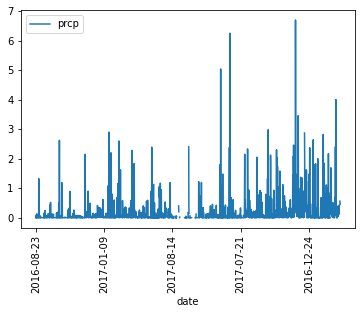

In [98]:
# Plotting
date_df.plot(rot=90)


In [99]:
# Summary stats
date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
station_data

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [18]:
# Design a query to calculate the total number of stations in the dataset.

station_location = session.query(station)
number=[]

for location in station_location:
    number.append(station.station)

print(f' The total number of stations is {len(number)}')

 The total number of stations is 9


In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?).
active = pd.read_sql("SELECT measurement.station,COUNT(measurement.date) FROM measurement GROUP BY measurement.station ORDER BY measurement.station ", conn)
active

# List the stations and observation counts in descending order.

active.sort_values(by='COUNT(measurement.date)', ascending=False)

,station,COUNT(measurement.date)
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [31]:
# Which station id has the highest number of observations?
print(f' Station USC00519281 had the most number of observations')

 Station USC00519281 had the most number of observations


In [46]:
# Using the most active station id, calculate the lowest, highest, and average temperature.

sel = [measurement.station,
      func.max(measurement.tobs),
      func.min(measurement.tobs),
      func.avg(measurement.tobs)]

active_station=session.query(*sel).\
    filter(measurement.station=='USC00519281').\
    group_by(measurement.station).\
    order_by(measurement.station).all()



print(f'Station __Highest_Lowest_Average')
print(active_station)

Station __Highest_Lowest_Average
[('USC00519281', 85.0, 54.0, 71.66378066378067)]


In [48]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
temp_obs = pd.read_sql("SELECT * FROM measurement WHERE date <='2017-08-23' AND date  >= '2016-08-23'AND station ='USC00519281' ", conn)
temp_obs

,id,station,date,prcp,tobs
0,14608,USC00519281,2016-08-23,1.79,77.0
1,14609,USC00519281,2016-08-24,2.15,77.0
2,14610,USC00519281,2016-08-25,0.06,80.0
3,14611,USC00519281,2016-08-26,0.01,80.0
4,14612,USC00519281,2016-08-27,0.12,75.0
...,...,...,...,...,...
347,14955,USC00519281,2017-08-14,0.00,77.0
348,14956,USC00519281,2017-08-15,0.32,77.0
349,14957,USC00519281,2017-08-16,0.12,76.0
350,14958,USC00519281,2017-08-17,0.01,76.0


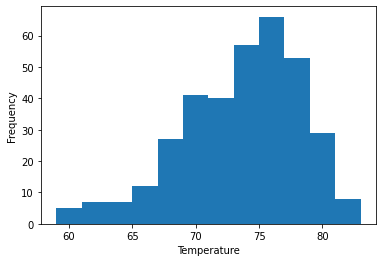

In [51]:
# Plot histogram
plt.hist(temp_obs.tobs, bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [52]:
from flask import Flask

In [53]:
app = Flask(__name__)

In [54]:
session.close()